# Data representation on Covid-19 Data across countries

### General Introduction: 
<br>
Due to the existing Covid-19 cases and deaths all over the world, the general public needs to be aware of the situation the world is in with daily updates. The Covid-19 pandemic began at the end of 2019 and has continued to this date. The virus has also evolved during this period causing more deaths in the world.

According to the records by WHO, as of 29 June 2021, it has been reported that there are over 2.6 million new cases and 57 000 new deaths reported globally within the week. This has been one of the weeks with the lowest weekly mortality figure since those recorded in early November 2020. For users to understand the situation of this pandemic, this project will come in useful.

This project shows statistical data on the Covid-19 based information representing it through plotting graphs. The scope of this project so far is focused on providing users with the following information. This information would be the comparison of the new cases, deaths recorded for the top 10 countries, the trend of fatality percentages across ranked top 10 countries and the comparison of the number of cases and the number of deaths of the top 5 countries. More information on this project will be explained in-depth in this report.

### Aims:
<br>
This project aims to enable the end-users of the final project to be able to view the different data representations that explain the severity of the pandemic across countries on daily basis.  


### Objectives: 

<p>The objective of this project ultimately is to provide proper graphs of data representations. These graphs should be able to present the total number of cases and deaths across the top 10 countries, the fatality percentage trend of the top 10 ranked countries. Along the way, the project should retrieve live data appropriately which is saved as DataFrame using Pandas library. Then, the collected data is converted as a CSV file for storing. Once the data is stored, that particular data should be able to be readable and analysed. This CSV data that is read should be able to produce a graph that shows the total cases across the top 10 countries, the fatality percentage across the top 10 countries and the comparison of total deaths and cases across the first 5 countries.</p> 

### Evaluation of aims and objectives:
<p>The live table representation of the countries, total cases, total deaths, etc. is relevant to the project as it provides the basic data required to derive the fatality percentage.</p>
<br>
$$Fatality\;percentage\; = \frac{Total Deaths}{Total Cases} \times 100$$

<p>The total number of deaths and the cases would first be converted to numeric form from the data frame. This would be used to construct a graph for the top 10 countries with most Covid-19 cases, Covid-19 related deaths and the comparison of deaths and cases in the first 5 countries.</p>

<p>The same information on the total number of cases and deaths is used to account for the fatality percentage would be calculated from the above formula which would then be utilised. Once the fatality percentage for every country is calculated in the data frame, it is sorted in descending order and the first 10 countries are chosen to be drawn in a line and horizontal bar graph.</p> 

<p>Through this line and horizontal bar graph, the user can view how the fatality percentage varies across the first 10 countries to be highly fatal during the Covid-19 pandemic.</p>

### Data Processing Pipeline:
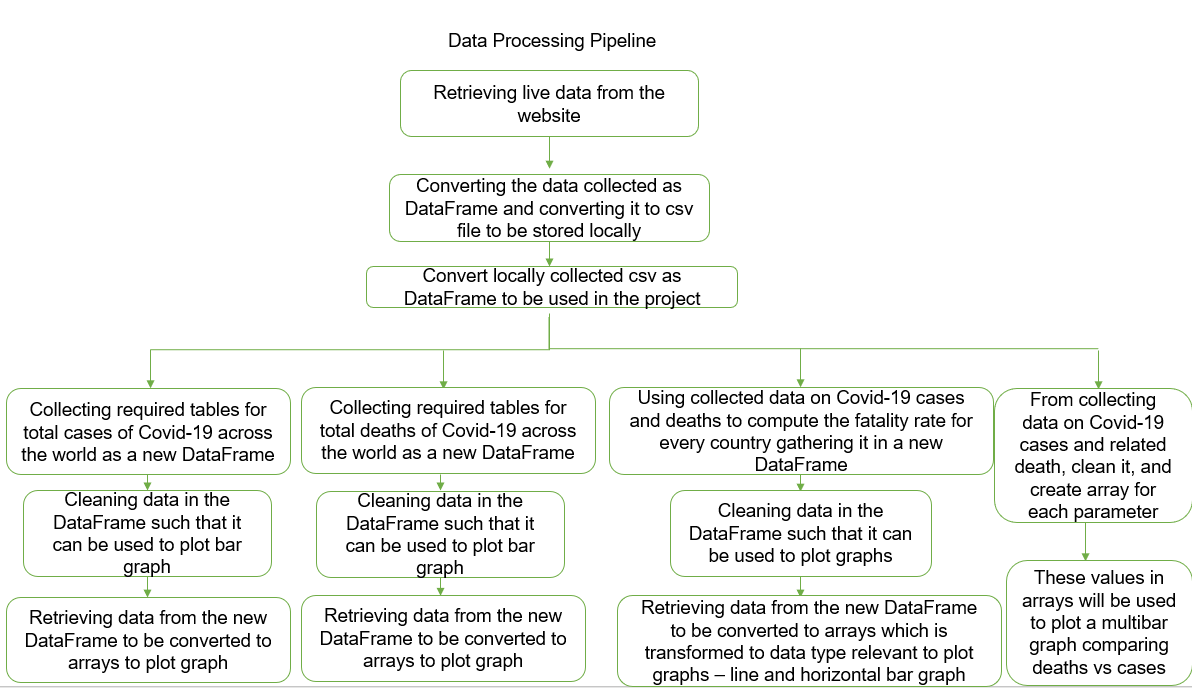

### Field of interest:
    
<p>These data representations would be relevant to businessmen or those people who would still be visiting other countries to be able to view if the specific country they are visiting would be wise during the pandemic. It also enables normal users to view how their country compared to the other countries in the world is coping with the pandemic. The users will be able to view the situation the world is in the pandemic.</p>

<p>So far, when researching these data representations, live data is collected and the data only represents the total cases and deaths separately. The fatality rate is not calculated in most applications especially on websites hence my data representation would be an unresearched aspect of data representation of covid 19 cases. 
During this pandemic, people must be aware of the severity of the pandemic across countries so that they would stay safe.</p> 


### Scope of the project: 
For this data representation of covid 19 on the fatality percentage, only the country, the total number of cases,  the total number of deaths columns have been utilised.  These data from the table retrieved would be analysed for computing the top 10 countries’ fatality percentages. The new number of deaths, cases, recovered cases, new recovered cases, active cases, serious/critical cases have not been utilised yet in this project. However, data that is not analysed is necessary when the scope and scale of the data representation widen for a final year project idea. This idea might include analysing data to provide a prediction of the situation of this pandemic might progress. These predictions would depend on the trends observed now through graphs plotted for relative comparison. 

### Code Implementation

In [1]:
import bs4
import urllib
from urllib.request import urlopen as req
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns

#### Web Scrapping

In [2]:
#Using this data, the live data on the Covid-19 can be extracted to be used in data manipulation 
#The data manipulation help with understanding of the users on the pandemic when the project is developed to a greater scale
def data_Downloader():
#This function is to test and retrieve the webpage used to retrieve data
    def get_soup(URL,  jar=None):
        request_headers = {"update-insecure-requests":"1",
                           "user-agent": "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:47.0) Gecko/20100101 Firefox/47.0",
                           "accept-language": "zh-CN,zh;q=0.8,en-US;q=0.5,en;q=1.0",
                           "accept": "*/*", "accept-encoding": "gzip, deflate, br"}

        if jar:
            r = requests.get(URL, cookies=jar, headers=request_headers)
        else:
            r = requests.get(URL, headers=request_headers)
            jar = requests.cookies.RequestsCookieJar()
            #print(r.url)
            data = r.text
            soup = BeautifulSoup(data, "lxml")
            return soup, jar

    covid_url = 'https://www.worldometers.info/coronavirus/#countries'
    soup, jar = get_soup(covid_url)
    soup
    #Error handling
    try:
        response = requests.get(covid_url)
    except URLError as url_error:
        print("Server Not Found")
    else:
        print("There is no error in the url used")
    #Once the webpage is retrieved and there is access to the information found on the webpage, inspectation is done 
    #Relevant section needed for the data manipulation is acquired which would be the Covid 19 data table
    #Once the tag and id used is found, it is found using the .find() in-built function to reach the section required
    #To acquire the data, we have to look within the table and in the tr tag
    covid_19_table = soup.find("table",id="main_table_countries_today")
    covid_19_table_data = covid_19_table.tbody.find_all("tr")

    dic = {}
    # the found data is being added as an item to the dictionary is done by using a new index key called key and 
    # the key is assigned the found data values by using the find_all() function to get the a tags  
    # a tags contain the countries name and its relevant data
    #The try and except is used as some values are contained in the td tags, to get that, if a tags fail to get all the data required
    for i in range(len(covid_19_table_data)):
        try:
            key = covid_19_table_data[i].find_all("a", href = True)[0].string
        except:
            key = covid_19_table_data[i].find_all("td")[0].string

        values = [j.string for j in covid_19_table_data[i].find_all('td')]

        dic[key] = values
    #The coloumn names are created as an array to name the tabular data collected from the web page
    column_names = ["Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered","New Recovered", "Active", "Serious/Critical", "Total Cases/1M pop", "Total Death/1M pop"]
    #The required dataset is being extracted from the webpage and inserted into a dataframe for data manipulation later on
    df = pd.DataFrame(dic).iloc[2:,:].T.iloc[:,:10]

    #The index name of the dataframe is set as country
    df.index_name = "country"

    #The column_names array is the first row which would be used to indicate what each column's data is
    df.columns = column_names 

    df.head()
    #Here the dataframe is converted to csv 
    df.to_csv("Covid_live_cases.csv")

    #Used to test if the function is working
    print("code worked")

In [3]:
#for collecting live data, this function is being called, if the output is 'code worked' would mean the live data is collected properly and stored as csv for later use
data_Downloader()

There is no error in the url used
code worked


In [4]:
#The data from csv is being read as DataFrame using the panda library
df_csv=pd.read_csv("Covid_live_cases.csv")

In [5]:
#The DataFrame is named here
covid_csv = df_csv.iloc[1:,:]

In [6]:
covid_csv

,Unnamed: 0,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active,Serious/Critical,Total Cases/1M pop,Total Death/1M pop
1,USA,"43,256,838","+14,536","697,055",+188,"32,833,180","+3,155","9,726,603","23,831","129,755","2,091"
2,India,"33,557,583","+27,506","446,025",+224,"32,802,416","+26,209","309,142","8,944","24,029",319
3,Brazil,"21,247,094",NaN,"591,518",NaN,"20,250,198",NaN,"405,378","8,318","99,098","2,759"
4,UK,"7,530,103","+34,460","135,621",+166,"6,075,733","+32,176","1,318,749",943,"110,215","1,985"
5,Russia,"7,333,557","+19,706","200,625",+817,"6,542,213","+16,102","590,719","2,300","50,226","1,374"
...,...,...,...,...,...,...,...,...,...,...,...
219,Marshall Islands,4,NaN,,NaN,4,NaN,0,NaN,67,NaN
220,Samoa,3,NaN,,NaN,3,NaN,0,NaN,15,NaN
221,Saint Helena,2,NaN,,NaN,2,NaN,0,NaN,328,NaN
222,Micronesia,1,NaN,,NaN,1,NaN,0,NaN,9,NaN


In [7]:
#This is used to view all the columns in the dataframe and ensure that it follows the order given in the dataframe when collecting the live data
covid_csv.columns

Index(['Unnamed: 0', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active', 'Serious/Critical',
       'Total Cases/1M pop', 'Total Death/1M pop'],
      dtype='object')

In [8]:
#To view the types of data collected in each column
covid_csv.dtypes

Unnamed: 0            object
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths            object
Total Recovered       object
New Recovered         object
Active                object
Serious/Critical      object
Total Cases/1M pop    object
Total Death/1M pop    object
dtype: object

In [9]:
#The first dataFrame to be manipulated is created where the total cases in each country is taken from the original dataframe(covid_csv)
df_1 = pd.DataFrame({'Total Cases':pd.Series(covid_csv['Total Cases'])})
#To view the number of rows and columns in the DataFrame, df_1
df_1.shape

(223, 1)

In [10]:
#To note down the type of the data of 'Total Cases'
type(df_1['Total Cases'])

pandas.core.series.Series

In [11]:
#To view DataFrame, df_1
df_1

,Total Cases
1,"43,256,838"
2,"33,557,583"
3,"21,247,094"
4,"7,530,103"
5,"7,333,557"
...,...
219,4
220,3
221,2
222,1


#### This segment is used to convert the series dataset of the total cases for covid into integers for data manipulation

In [12]:
df_1['Total Cases'] = df_1['Total Cases'].str.replace(',','')

In [13]:
df_1['Total Cases'].astype('str')

1      43256838
2      33557583
3      21247094
4       7530103
5       7333557
         ...   
219           4
220           3
221           2
222           1
223       95851
Name: Total Cases, Length: 223, dtype: object

In [14]:
c = df_1.select_dtypes(object).columns
df_1[c] = df_1[c].apply(pd.to_numeric,errors='coerce')

In [15]:
df_1

,Total Cases
1,43256838
2,33557583
3,21247094
4,7530103
5,7333557
...,...
219,4
220,3
221,2
222,1


In [16]:
#Calculating the mean number of cases in the world from the respective countries dataframe
df_1.mean()

Total Cases    1.033924e+06
dtype: float64

##### This is calculated to ensure that the values are sorted according when the dataframe is sorted in descending order

In [17]:
df_1.min()['Total Cases']

1

In [18]:
df_1.max()['Total Cases']

43256838

In [19]:
#The country of the total cases data is added to identify the number of cases dataset belongs to which country
df_1['Country'] = covid_csv["Unnamed: 0"]

In [20]:
df_1

,Total Cases,Country
1,43256838,USA
2,33557583,India
3,21247094,Brazil
4,7530103,UK
5,7333557,Russia
...,...,...
219,4,Marshall Islands
220,3,Samoa
221,2,Saint Helena
222,1,Micronesia


In [21]:
#The DataFrame, df_1 is sorted in descending order so that the data can be used to plot a bar graph showing how the statistics are for the total number of cases in the top 10 countries with covid 19 cases
df_1_sorted = df_1.sort_values(["Total Cases"], ascending=False)

In [22]:
df_1_sorted

,Total Cases,Country
1,43256838,USA
2,33557583,India
3,21247094,Brazil
4,7530103,UK
5,7333557,Russia
...,...,...
218,4,Vanuatu
219,4,Marshall Islands
220,3,Samoa
221,2,Saint Helena


In [23]:
#This part of the data will come in use when calculating the fatality percentage 
unsorted_first_10_countries = df_1.head()

In [24]:
#The first 10 countries are being selected fromt the dataframe to be used in the bar graph plotting on Total cases of covid 19 in respective countries
first_10_countries_sorted = df_1_sorted.head(10)

In [25]:
first_10_countries_sorted

,Total Cases,Country
1,43256838,USA
2,33557583,India
3,21247094,Brazil
4,7530103,UK
5,7333557,Russia
6,6964699,France
7,6904285,Turkey
8,5477229,Iran
9,5243231,Argentina
10,4943622,Colombia


### Total cases of Covid-19 in the top 10 countries - Bar Graph

In [26]:
#plotting the bar graph using matplotlib.pyplot library for the Total cases of Covid-19 in the top 10 countries
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
def total_cases_graph():
    fontstyling = {'family':'arial','color':'blue','size':14}
    xpoints = np.array(first_10_countries_sorted['Country'])
    ypoints = np.array(first_10_countries_sorted['Total Cases'])
    plt.xlabel('Countries')
    plt.ylabel('Number of people affected')
    plt.bar(xpoints, ypoints, color=['black', 'red', 'green', 'blue', 'cyan','pink','yellow','orange','indigo','grey'])
    plt.xticks(xpoints,rotation=45)
    plt.title("Total Cases in top 10 countries", fontdict = fontstyling)
    plt.show()

#### Second major dataframe created to view the total deaths in the respective countries

In [27]:
#The 'Total Deaths' column is selected from the DataFrame(covid_csv) and created into a new dataframe
df_2 = pd.DataFrame({'Total Deaths':pd.Series(covid_csv['Total Deaths'])})

In [28]:
df_2

,Total Deaths
1,"697,055"
2,"446,025"
3,"591,518"
4,"135,621"
5,"200,625"
...,...
219,
220,
221,
222,


#### This segment is used to convert the series dataset of the total cases for covid into integers for data manipulation

In [29]:
df_2['Total Deaths'] = df_2['Total Deaths'].str.replace(',','')

In [30]:
df_2['Total Deaths'].astype('str')

1      697055 
2      446025 
3      591518 
4      135621 
5      200625 
        ...   
219           
220           
221           
222           
223      4636 
Name: Total Deaths, Length: 223, dtype: object

In [31]:
c = df_2.select_dtypes(object).columns
df_2[c] = df_2[c].apply(pd.to_numeric,errors='coerce')

In [32]:
#Calculating the mean number of deaths in the world from the respective countries dataframe
df_2.mean()

Total Deaths    22295.716981
dtype: float64

#### This is calculated to ensure that the values are sorted according when the dataframe is sorted in descending order

In [33]:
df_2.min()['Total Deaths']

1.0

In [34]:
df_2.max()['Total Deaths']

697055.0

In [35]:
#The country of the total deaths data is added to identify the number of deaths dataset belongs to which country
df_2['Country'] = covid_csv["Unnamed: 0"]

In [36]:
df_2 

,Total Deaths,Country
1,697055.0,USA
2,446025.0,India
3,591518.0,Brazil
4,135621.0,UK
5,200625.0,Russia
...,...,...
219,NaN,Marshall Islands
220,NaN,Samoa
221,NaN,Saint Helena
222,NaN,Micronesia


In [37]:
#The DataFrame, df_2 is sorted in descending order so that the data can be used to plot a bar graph showing how the statistics are for the total number of deaths in the top 10 countries with covid 19 cases
df_2_sorted = df_2.sort_values(["Total Deaths"], ascending=False)

In [38]:
df_2_sorted

,Total Deaths,Country
1,697055.0,USA
3,591518.0,Brazil
2,446025.0,India
15,272580.0,Mexico
5,200625.0,Russia
...,...,...
217,NaN,"18,199"
219,NaN,Marshall Islands
220,NaN,Samoa
221,NaN,Saint Helena


In [39]:
#This part of the data will come in use when calculating the fatality percentage 
unsorted_first_10_countries_deaths = df_2.head()

In [40]:
#The first 10 countries are being selected from the dataframe to be used in the bar graph plotting on Total deaths of covid 19 in respective countries
first_10_countries_deaths_sorted = df_2_sorted.head(10)

### Total deaths of Covid-19 in the top 10 countries - Bar Graph

In [41]:
#plotting the bar graph using matplotlib.pyplot library for the Total deaths of Covid-19 in the top 10 countries
def total_deaths_graph():
    fontstyling = {'family':'arial','color':'black','size':14}
    xpoints = np.array(first_10_countries_deaths_sorted['Country'])
    ypoints = np.array(first_10_countries_deaths_sorted['Total Deaths'])
    plt.bar(xpoints, ypoints,color=['pink','yellow','orange','indigo','grey','black', 'red', 'green', 'blue', 'cyan'])
    plt.xticks(xpoints,rotation=45)
    plt.xlabel('Countries')
    plt.ylabel('Number of people affected')
    plt.title("Total Deaths in top 10 countries", fontdict = fontstyling)
    plt.show()

#### To find the fatality percentage of covid cases in all countries:
$$Fatality\;percentage\; = \frac{Total Deaths}{Total Cases} \times 100$$

In [42]:
fatality_percentage = (df_2['Total Deaths']/df_1['Total Cases'])*100

In [43]:
#Collecting the manipulated information into a new DataFrame
df_fatality_percentage = pd.DataFrame({'Percentage':pd.Series(fatality_percentage)})

In [44]:
#Converting the DataFrame data into integers so that they can be utilized when plotting it into a line graph
c = df_fatality_percentage.select_dtypes(object).columns
df_fatality_percentage[c] = df_fatality_percentage[c].apply(pd.to_numeric,errors='coerce')

In [45]:
#The country of the fatality percentage data is added to identify the dataset belongs to which country
df_fatality_percentage['Country'] = covid_csv["Unnamed: 0"]

In [46]:
df_fatality_percentage

,Percentage,Country
1,1.611433,USA
2,1.329133,India
3,2.783995,Brazil
4,1.801051,UK
5,2.735712,Russia
...,...,...
219,NaN,Marshall Islands
220,NaN,Samoa
221,NaN,Saint Helena
222,NaN,Micronesia


In [47]:
#The DataFrame, df_2 is sorted in descending order so that the data can be used to plot a line graph showing how the statistics are for the fatality percentage in the top 10 countries with covid 19 cases
df_fatality_percentage_sorted = df_fatality_percentage.sort_values(["Percentage"], ascending=False)

In [48]:
df_fatality_percentage_sorted

,Percentage,Country
218,25.000000,Vanuatu
216,22.222222,216
171,18.898537,Yemen
215,10.000000,Western Sahara
20,9.179909,Peru
...,...,...
217,NaN,"18,199"
219,NaN,Marshall Islands
220,NaN,Samoa
221,NaN,Saint Helena


In [49]:
#The first 10 countries are being selected from the dataframe to be used in the line graph plotting on Fatality Percentage of Covid 19 in respective countries
df_top_10_fatality_percentage_sorted = df_fatality_percentage_sorted.head(10)

### Fatality Percentage of Covid-19 in the top 10 countries - Line Graph and bar graph

In [50]:
#plotting the line graph using matplotlib.pyplot library for the Fatality Percentage of Covid-19 in the top 10 countries
def fatality_graph():
    Data = {'Country':np.array(df_top_10_fatality_percentage_sorted['Country']),
            'Fatality Percentage':np.array(df_top_10_fatality_percentage_sorted['Percentage'])
           }
    df = pd.DataFrame(Data,columns=['Country','Percentage'])
  
    fontstyling = {'family':'arial','color':'brown','size':14}
    plt.plot(df_top_10_fatality_percentage_sorted['Country'], df_top_10_fatality_percentage_sorted['Percentage'], color='red', marker='o')
    plt.xticks(df_top_10_fatality_percentage_sorted['Country'],rotation=45)
    plt.title('Fatality Percentage of Covid-19 in the top 10 countries ', fontdict = fontstyling)
    plt.xlabel('Ranked Countries', fontsize=14)
    plt.ylabel('Fatality Percentage/%', fontsize=14)
    plt.grid(True)
    plt.autoscale(enable=True, axis='both', tight=None)
    plt.show()
#plotting the bar graph using matplotlib.pyplot library for the fatality percentage of Covid-19 in the top 10 countries
def total_fatality_bar_graph():
    fontstyling = {'family':'arial','color':'black','size':14}
    xpoints = np.array(df_top_10_fatality_percentage_sorted['Country'])
    ypoints = np.array(df_top_10_fatality_percentage_sorted['Percentage'])
    plt.barh(xpoints, ypoints)
    plt.xlabel('Fatality Percentage/%')
    plt.ylabel('Ranked Countries from 1st to 10th positions/x^th position')
    plt.title("Fatality Percentage in top 10 countries", fontdict = fontstyling)
    plt.show()
def seabornlibrary_format():
    Data = {'Country':np.array(df_top_10_fatality_percentage_sorted['Country']),
            'Fatality Percentage':np.array(df_top_10_fatality_percentage_sorted['Percentage'])
           }
    df1 = pd.DataFrame(Data,columns=['Country','Percentage'])
    sns.lineplot(data=df1, x="Country", y="Percentage")

#### Evaluating reason for possible error
<h6>Why does the multibar graph have the AttributeError: 'AxesSubplot' object has no attribute 'bar_label'.</h6> 
<p>If the Jupyter notebook utilises the 3.2.2 matplotlib version, it would not be able to perform the subplots() function which requires the 3.4.2 version of matplotlib</p>

In [51]:
import matplotlib
print(matplotlib.__version__, matplotlib.__file__)

3.4.2 C:\Users\karishma\anaconda3\lib\site-packages\matplotlib\__init__.py


### Multibar graph to show the total deaths and total cases of Covid-19 in the top 10 countries in one graph

In [52]:
def total_cases_vs_deaths_graph():
    countries = np.array(unsorted_first_10_countries['Country'].head(5))
    deaths =  np.array(unsorted_first_10_countries_deaths['Total Deaths'].head(5))
    cases = np.array(unsorted_first_10_countries['Total Cases'].head(5))
    fontstyling = {'family':'arial','color':'DodgerBlue','size':14}
    x = np.arange(len(countries)) # the label locations
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 6))
    deaths_bar = ax.bar(x - width/2, deaths, width, label='Total Deaths')
    cases_bar = ax.bar(x + width/2, cases, width, label='Total Cases')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Countries')
    ax.set_ylabel('Number of people affected')
    ax.set_title("Total Deaths and Cases in top 5 countries", fontstyling)
    ax.set_xticks(x)
    ax.set_xticklabels(countries,rotation=45)
    ax.legend()

    ax.bar_label(deaths_bar, padding=3)
    ax.bar_label(cases_bar, padding=3)

    fig.tight_layout()

    plt.show()

In [54]:
x = df_1['Total Cases']
y = df_2['Total Deaths']
z = df_1['Country']
d = {'Total Cases': x,'Total Deaths':y, 'Country':z}
df1 = pd.DataFrame(d)

In [55]:
df1

,Total Cases,Total Deaths,Country
1,43256838,697055.0,USA
2,33557583,446025.0,India
3,21247094,591518.0,Brazil
4,7530103,135621.0,UK
5,7333557,200625.0,Russia
...,...,...,...
219,4,NaN,Marshall Islands
220,3,NaN,Samoa
221,2,NaN,Saint Helena
222,1,NaN,Micronesia


In [56]:
df1.head(20)

,Total Cases,Total Deaths,Country
1,43256838,697055.0,USA
2,33557583,446025.0,India
3,21247094,591518.0,Brazil
4,7530103,135621.0,UK
5,7333557,200625.0,Russia
6,6964699,116251.0,France
7,6904285,62065.0,Turkey
8,5477229,118191.0,Iran
9,5243231,114579.0,Argentina
10,4943622,125962.0,Colombia


In [57]:
sns.set_style('dark')

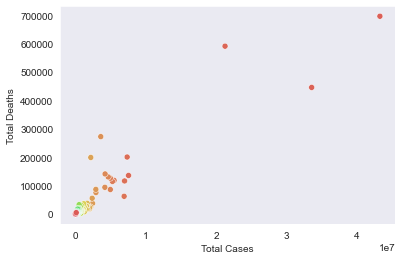

In [58]:
g =sns.scatterplot(x="Total Cases", y="Total Deaths", hue="Country",
              data=df1, 
                    palette=sns.color_palette("hls", 223),legend = False)


### Dataset: 
<p>The data that was collected from the live web-scrapping was converted to a CSV file to be accessed locally. To read the CSV file in a better format, it was converted to a DataFrame using the panda library. The DataFrame is used to convert the values into the numeric form using the pd.to_numeric function within the panda library. Once in numeric form, the data is sorted in descending order to capture the top 10 countries with the most covid cases, the highest number of covid deaths and the highest fatality percentages in the world. The sort function is performed by using the sorted_values() attribute within the DataFrame functionalities in the panda library. The mean, min and max values are also calculated for the total cases and the total deaths due to the pandemic so that it can be used to check if the values are sorted properly in the DataFrame for the respective columns. The capturing of the top 10 countries is done once the DataFrame is sorted and then the first 10 rows are taken using the head() function using the DataFrame.</p> 

### Bar Graphs on total cases and total deaths in top 10 countries

<p>The number of total cases, number of total deaths were tabulated and plotted as bar graphs separately so that the representation of cases and deaths were able to be seen. This provides an understanding for the users before viewing the top 10 countries’ fatality percentages as a line and horizontal bar graph. The bar graphs were used for the total cases and total deaths so that there can be observations in the difference in cases and deaths between the top 10 countries of the covid cases and deaths. The purpose of a bar graph is to convey relational information quickly as the bars display the number of cases or deaths for a particular country depending on the bar graph. The dataset values used in the bar graphs are used by converting the DataFrame values into arrays using the NumPy function for arrays, np.array().<p> 

#### Importing HTML to include style settings in the display of graphs plotted

In [59]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

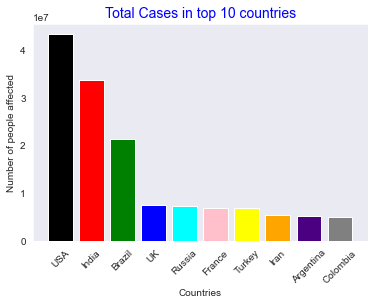

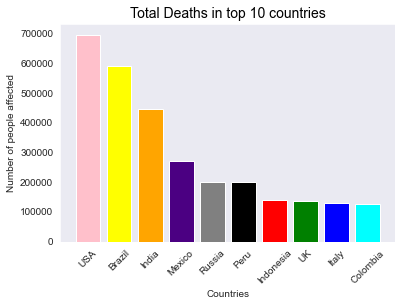

In [60]:
total_cases_graph()
total_deaths_graph()

### Line Graph and horizontal bar graph on Fatality Percentage

<p>A line graph is used to display change in the fatality percentages over the top 10 ranked countries with high fatality percentages. The line graph helps to determine the relationship between how the percentages vary over the top 10 countries. The highest fatality percentage is approximately 25% however the difference between the first country’s high fatality percentage and the 10th country’s fatality percentage shows how the percentage declines between the first and last ranked country across the top 10 countries.</p>

<p>This line graph below shows that there is a huge decline in the fatality percentage from Yemen to Western Sahara and the relative ranks of countries after Sudan tend to be lesser. The abnormality of this graph would be the increased percentage drop in fatality percentage from the 3rd to the 4th ranked country. The dataset values used in the line graphs are used by converting the DataFrame values into arrays using the NumPy function for arrays, np.array(). Then, these arrays are put into a dictionary which would be accessed later as it is converted into another DataFrame to show the fatality percentages of the top 10 countries.</p>

<p>A horizontal line graph is used to represent the same fatality data horizontally across the top 10 countries sorted in descending order. This is a bar graph whose bars are drawn horizontally. The name of the countries are shown on the vertical axis and the fatality percentages are shown on the horizontal axis. This project enables the user to compare the differences in fatality percentages across the top 10 countries with a varied representation.</p>

<p>The dataset values used in the horizontal bar graphs are used by converting the DataFrame values into arrays using the NumPy function for arrays, np.array(). Then, these arrays are put into a dictionary which would be accessed later as it is converted into another DataFrame to show the fatality percentages of the top 10 countries.</p>

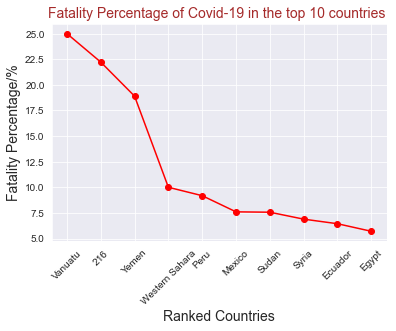

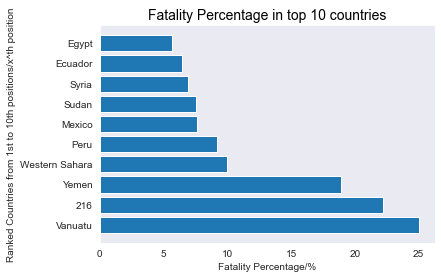

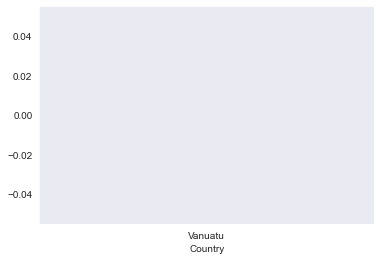

In [61]:
fatality_graph()
total_fatality_bar_graph()
seabornlibrary_format()

### MultiBar Graph on total deaths and cases for first 5 countries

<p>A multiple bar graph shows the relationship between the total cases and the total deaths between the first 5 countries. Each data value is represented by a column in the graph. The first set of data values is the total deaths data and the second set of data values is the total cases data. In a multiple bar graph, these multiple data points for each category of data are shown with the addition of columns. The number of cases and deaths data is listed along the vertical, or y, axis. The dataset values used in the bar graphs are used by converting the DataFrame values into arrays using the NumPy function for arrays, np.array(). <b>For the multiple bar graph, the attribute error occurs if the matplotlib that is utilised in the Juypter Notebook</b> was <b>version 3.2.2</b> whereas the <b>version required to draw the multiple bar graph for the bar_label requires the 3.4.2 version of matplotlib.</b></p> 


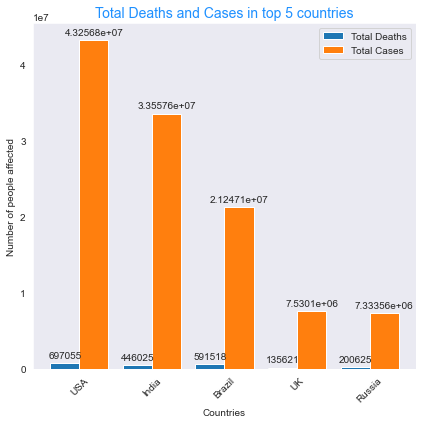

In [62]:
total_cases_vs_deaths_graph()

### Ethics of use of data: 
<p>Web-scrapped live data's cite source: https://www.worldometers.info/coronavirus/#countries.
<p>This dataset is accurate as the data collected is from a trustable website. The columns in the data frames are provided accordingly hence comprehension of these data frames would not be difficult.</p> 
<p>The relevant data is extracted from the live data that is stored as CSV so that the data manipulation is done clearly for the person who inspects the code and so that the code could be developed easily when widening the scope of this project.</p>

#### Considerations of reusing data:
<p>The data retrieved can also be used to compare trends of the live data collected and create relative graphs and computations to predict future death count and case count based on the trend of the current situation of the pandemic.</p> 
<p>Additionally, the developer can use the fatality percentages from the line graph and bar graph to compare the differences across the ranked countries on how the trends of these graphs vary from the 1st position to the 2nd position and so on.</p>
<p>The multigraph can be used to analyse how the Covid-19 cases vary across the first 5 countries. Instead of just analyzing for a set of 5 countries, the scope can be expanded to view the changes across more countries.</p>

#### Implications of utilising data:
<p>Despite the ability to produce predictions based on the fatality rates across the top few countries, the information that is produced when collecting this live information may not be accurate as some countries do not record all cases due to the lack of availability of toolkits in rural areas of the countries.</p> 
<p>There could be some errors in the dataset when considering datasets from less developed countries as the toolkit in those countries are very limited. These factors might affect the results gathered when sorting the number of covid cases for developing countries like Utopia.</p>
<p>For example, in a developing country, the cases reported could be around 400000 cases. There could be a possibility that only 50% of the country's population might have been tested due to over-population. Another area where the data might be inaccurate in developing countries would be the cause of death which might have arisen from Covid-19. In these countries, the cause of death might have been thought of as death due to other natural causes due to lack of resources to check if the death was due to Covid-19. Hence, data in these regions might not be as accurate and might result in false predictions on analysis of the line graph and the horizontal bar graph used by looking at fatality percentage of top 10 ranked countries.</p>     

#### Potential biases of the dataset:
<p>In this project, only the datasets of the top 5 or 10 countries are considered in the dataset. This dataset is used to evaluate the comparison of Covid-19 cases and deaths across the countries which would be used later on to make predictions.
However, the representation might not be the best as there are countries that have reduced the number of cases and deaths significantly through various measures by the country's government. Hence, while widening the scope, more countries have to be considered to compare results and view trends.
</p>


### Evaluation: 
<p>
The data representation of Covid-19 mainly focuses on the total number of cases, the total number of deaths and the fatality percentages for the top 10 countries which is only a small aspect of the data representation. The recovered records and the addition of new cases and deaths daily should also consider as a factor when representing the data for the covid-19 pandemic which can be expanded further in the development of this project. 
<p>The limitations of this particular project are the limitation of the Juypter Notebook as the version for the libraries used is limited and not the latest version for all libraries. The focus of the graphs is only on the top 10 countries which are sorted based on countries with worse records. The modification would be to include more countries and plot graphs for the total cases, total deaths and fatality percentage for all the countries.</p> 


### References:
<ol>
    <li>worldometer (2020). Coronavirus Update (Live): 69,290 Cases and 1,671 Deaths from COVID-19 Wuhan China Virus Outbreak - Worldometer. [online] www.worldometers.info. Available at: https://www.worldometers.info/coronavirus/#countries.</li>
    <li>www.who.int. (n.d.). Weekly epidemiological update on COVID-19 - 29 June 2021. [online] Available at: https://www.who.int/publications/m/item/weekly-epidemiological-update-on-covid-19---29-june-2021.</li>
</ol?